In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples = 200, n_features = 2, cluster_std = 1.8, random_state = 101)

In [4]:
x = pd.DataFrame(data[0], columns = ['x', 'y'])

In [5]:
y = pd.Series(data[1])

In [6]:
dataset = x.copy()

In [7]:
dataset['target'] = y

In [8]:
dataset.head()

,x,y,target
0,0.827032,2.954032,2
1,-10.134476,-3.431308,1
2,-0.125442,0.372735,0
3,-2.161284,4.081844,0
4,-11.782184,-9.508830,1


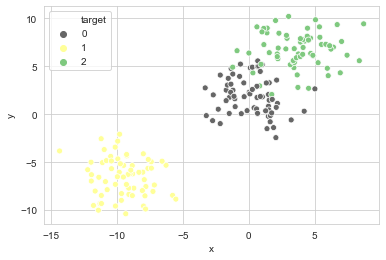

In [9]:
sns.set_style('whitegrid')
sns.scatterplot(data = dataset, x = 'x', y = 'y', hue = 'target', palette = 'Accent_r')

In [10]:
from sklearn.cluster import KMeans

In [11]:
model = KMeans(n_clusters = 4)

In [12]:
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
cluster_model = model.labels_

In [14]:
dataset_model = x.copy()

In [15]:
dataset_model['target'] = cluster_model

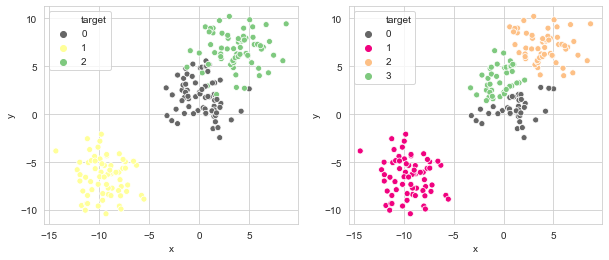

In [16]:
sns.set_style('whitegrid')
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10,4))
sns.scatterplot(data = dataset, x = 'x', y = 'y', hue = 'target', palette = 'Accent_r', ax = ax[0], )
sns.scatterplot(data = dataset_model, x = 'x', y = 'y', hue = 'target', palette = 'Accent_r', ax = ax[1])

In [17]:
model.cluster_centers_

array([[ 1.09093667,  0.56542952],
       [-9.47785082, -6.50347007],
       [ 4.09919586,  7.08911298],
       [-0.42418575,  3.62078603]])

In [18]:
from yellowbrick.cluster import KElbowVisualizer

In [19]:
viz = KElbowVisualizer(KMeans(), k = (1,10))

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1c22f65438>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

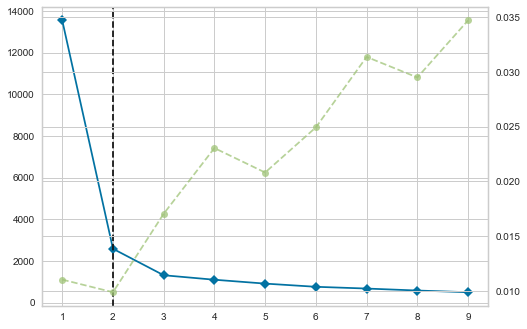

In [20]:
viz.fit(x)

In [21]:
model_k_2 = KMeans(n_clusters = 2)

In [22]:
model_k_2.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [23]:
dataset_model_k_2 = x.copy()

In [24]:
dataset_model_k_2['target'] = model_k_2.labels_

In [25]:
pd.Series(model_k_2.labels_).value_counts()

0    133
1     67
dtype: int64

In [26]:
pd.Series(model.labels_).value_counts()

1    67
2    57
3    39
0    37
dtype: int64

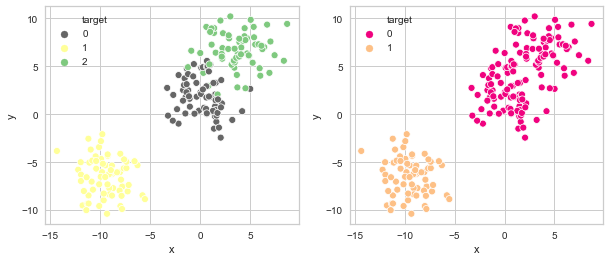

In [28]:
sns.set_style('whitegrid')
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10,4))
sns.scatterplot(data = dataset, x = 'x', y = 'y', hue = 'target', palette = 'Accent_r', ax = ax[0])
sns.scatterplot(data = dataset_model_k_2, x = 'x', y = 'y', hue = 'target', palette = 'Accent_r', ax = ax[1])